In [39]:
%matplotlib notebook

In [41]:
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [42]:
#loading and reading the csv file
crimes_csv = "../toronto-crime-analysis/crimes_csv.csv"
crimes_pd = pd.read_csv(crimes_csv)
crimes_pd['occurrencedate'] = pd.to_datetime(crimes_pd['occurrencedate'], unit = 'ms')
#crimes_pd['reporteddate'] = pd.to_datetime(crimes_pd['reporteddate'], unit='ms')
crimes_pd.head()

,Unnamed: 0,Hood_ID,Index_,MCI,Neighbourhood,event_unique_id,occurrencedate,occurrenceday,occurrencedayofweek,occurrencedayofyear,occurrencehour,occurrencemonth,occurrenceyear,offence,premisetype
0,0,84,976,Assault,Little Portugal (84),GO-2015942420,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
1,1,25,977,Assault,Glenfield-Jane Heights (25),GO-20162295518,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
2,2,71,978,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
3,3,71,979,Assault,Cabbagetown-South St.James Town (71),GO-20142458487,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Assault,Apartment
4,4,58,980,Theft Over,Old East York (58),GO-20141573896,2014-01-01 05:00:00,1,Wednesday,1,0,January,2014,Theft Over,House


In [43]:
#calculating the most common crimes in Toronto
most_common_crimes_count = crimes_pd.groupby('MCI').size()
most_common_crimes = most_common_crimes_count.to_frame().reset_index()
most_common_crimes = most_common_crimes.rename(columns= {0: 'Crime Count',
                                                         'MCI' : 'Crime Type'
                                                        })
most_common_crimes

,Crime Type,Crime Count
0,Assault,70817
1,Auto Theft,13435
2,Break and Enter,27269
3,Robbery,14549
4,Theft Over,4097


<IPython.core.display.Javascript object>


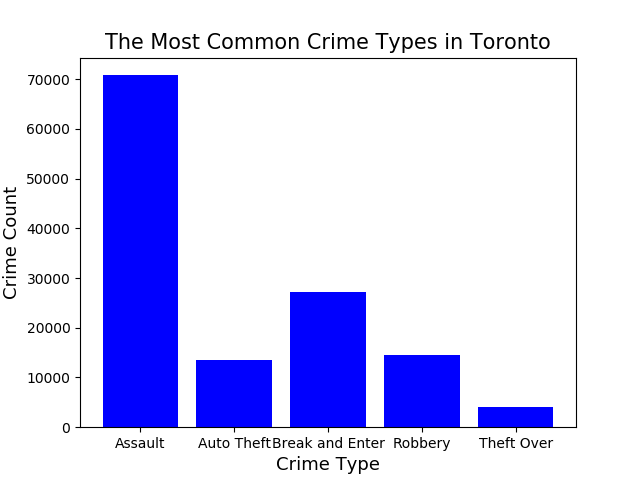

In [44]:
plt.bar(most_common_crimes['Crime Type'], most_common_crimes['Crime Count'], color="blue")
    

plt.title('The Most Common Crime Types in Toronto', fontsize = 15)
plt.xlabel('Crime Type', fontsize = 13)
plt.ylabel('Crime Count', fontsize = 13)
plt.savefig('../toronto-crime-analysis/The Most Common Crime Types')
plt.show()

,Crime Month,Crime Count
10,October,11642
5,July,11605
9,November,11408
1,August,11334
8,May,11313
11,September,11295
6,June,11268
0,April,10623
2,December,10455
7,March,10039


In [37]:
premise_type = crimes_pd.groupby('premisetype').size()
premise_type = premise_type.reset_index()
premise_type = premise_type.rename(columns= {0: 'Crime Count',
                                                         'premisetype' : 'Premise Type'
                                                        })
premise_type

,Premise Type,Crime Count
0,Apartment,31723
1,Commercial,24767
2,House,24640
3,Other,14119
4,Outside,34918
